# Decision Tree From Scratch

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Decision Tree Regressor

In [109]:
# Load Data
data = pd.DataFrame({"X": np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
                     "y": np.array([1, 1.2, 1.4, 1.1, 1.0, 5.5, 6.1, 6.7, 6.4, 6, 5.9, 3, 3.2, 3.1])})
data.head()

,X,y
0,1,1.0
1,2,1.2
2,3,1.4
3,4,1.1
4,5,1.0


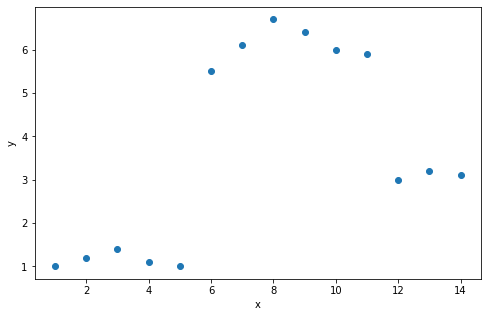

In [110]:
# plot data
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5))
ax.scatter(data['X'], data['y'])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Plot ulang data

In [111]:
# split data dengan fungsi
def split_data(data: pd.DataFrame, threshold: float or int):
    '''
    Split data into two regions
    Return: data_left <dataframe>, data_right <dataframe>
    '''
    data_left = data[data['X'] < threshold]
    data_right = data[data['X'] >= threshold]
    return data_left, data_right

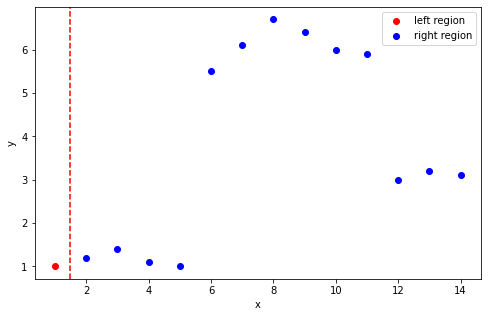

In [112]:
# threshold
thre = 1.5
# split data
data_left, data_right = split_data(data, thre)

# plot data
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5))
ax.scatter(data_left['X'], data_left['y'], c='r', label = 'left region')
ax.scatter(data_right['X'], data_right['y'], c='b', label = 'right region')
ax.axvline(x=thre, color='r', linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

Buat prediksi dan RMSE

In [113]:
# prediksi untuk regressor adalah rata-rata dari region
def calculate_prediction(data):
    # yang dihitung adalah data output
    pred = np.mean(data['y'])
    return pred

def calculate_rmse(y_test, y_pred):
    # root mean-squared error
    err = y_test-y_pred
    rmse = (np.mean(err**2))**0.5
    return rmse

In [114]:
# hitung prediksi region kiri
pred_left = calculate_prediction(data_left)

# hitung prediksi region kanan
pred_right = calculate_prediction(data_right)

# hitung rmse region kiri
rmse_left = calculate_rmse(data_left['y'], pred_left)

# hitung rmse region kanan
rmse_right = calculate_rmse(data_right['y'], pred_right)

In [115]:
print(f"Region kiri \n\t=> prediksi: {pred_left}\n\t=> RMSE: {rmse_left}")
print(f"Region kanan \n\t=> prediksi: {pred_right}\n\t=> RMSE: {rmse_right}")

Region kiri 
	=> prediksi: 1.0
	=> RMSE: 0.0
Region kanan 
	=> prediksi: 3.892307692307693
	=> RMSE: 2.1773171700906597


In [116]:
# menggabungkan fungsi-fungsi yang telah dibuat menjadi satu
def tree_regressor(data, threshold):
    data_left, data_right = split_data(data, threshold)
    # hitung prediksi region kiri
    pred_left = calculate_prediction(data_left)

    # hitung prediksi region kanan
    pred_right = calculate_prediction(data_right)

    # hitung rmse region kiri
    rmse_left = calculate_rmse(data_left['y'], pred_left)

    # hitung rmse region kanan
    rmse_right = calculate_rmse(data_right['y'], pred_right)

    print(f"Threshold: {threshold}")
    print(f"Region kiri \n\t=> prediksi: {pred_left}\n\t=> RMSE: {rmse_left}")
    print(f"Region kanan \n\t=> prediksi: {pred_right}\n\t=> RMSE: {rmse_right}")

    return pred_left, rmse_left, pred_right, rmse_right

In [117]:
# buat list untuk variasi threshold
thre_list = [*range(2, 15, 1)]

In [118]:
rmse_left = []
rmse_right = []

In [119]:
for thre in thre_list:
    data_left, data_right = split_data(data, thre)

    # hitung nilai prediksi
    pred_l = calculate_prediction(data_left)
    pred_r = calculate_prediction(data_right)

    if len(data_left)==0 or len(data_right)==0:
        pass
    # hitung nilai rmse
    rmse_l = calculate_rmse(data_left['y'], pred_l)
    rmse_r = calculate_rmse(data_right['y'], pred_r)

    rmse_left.append(rmse_l)
    rmse_right.append(rmse_r)
    print(f"="*25)
    print(f"Region kiri \n\t=> prediksi: {pred_l}\n\t=> RMSE: {rmse_l}")
    print(f"Region kanan \n\t=> prediksi: {pred_r}\n\t=> RMSE: {rmse_r}")
    print(f"="*25)

Region kiri 
	=> prediksi: 1.0
	=> RMSE: 0.0
Region kanan 
	=> prediksi: 3.892307692307693
	=> RMSE: 2.1773171700906597
Region kiri 
	=> prediksi: 1.1
	=> RMSE: 0.09999999999999998
Region kanan 
	=> prediksi: 4.116666666666667
	=> RMSE: 2.116929117587287
Region kiri 
	=> prediksi: 1.2
	=> RMSE: 0.16329931618554516
Region kanan 
	=> prediksi: 4.363636363636364
	=> RMSE: 2.0388377826919513
Region kiri 
	=> prediksi: 1.175
	=> RMSE: 0.14790199457749034
Region kanan 
	=> prediksi: 4.69
	=> RMSE: 1.844152922075607
Region kiri 
	=> prediksi: 1.1400000000000001
	=> RMSE: 0.1496662954709576
Region kanan 
	=> prediksi: 5.1000000000000005
	=> RMSE: 1.4483707321600288
Region kiri 
	=> prediksi: 1.8666666666666665
	=> RMSE: 1.6306099744846678
Region kanan 
	=> prediksi: 5.050000000000001
	=> RMSE: 1.5288884851420657
Region kiri 
	=> prediksi: 2.471428571428571
	=> RMSE: 2.115057774093914
Region kanan 
	=> prediksi: 4.8999999999999995
	=> RMSE: 1.5784259790780724
Region kiri 
	=> prediksi: 3.0
	=> 

In [126]:
rmse_left = np.array(rmse_left)
rmse_right = np.array(rmse_right)
rmse_total = rmse_left + rmse_right
best_threshold = thre_list[np.argmin(rmse_total)]

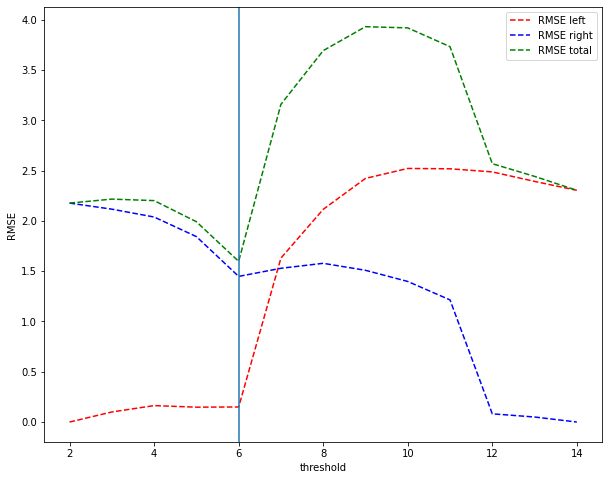

In [127]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 8))

ax.plot(thre_list, rmse_left, '--r', label='RMSE left')
ax.plot(thre_list, rmse_right, '--b', label='RMSE right')
ax.plot(thre_list, rmse_total, '--g', label='RMSE total')
ax.legend()
ax.axvline(best_threshold)
ax.set_xlabel('threshold')
ax.set_ylabel('RMSE')
plt.show()

berdasarkan eksperimen di atas, threshold terbaik adalah di titik 6

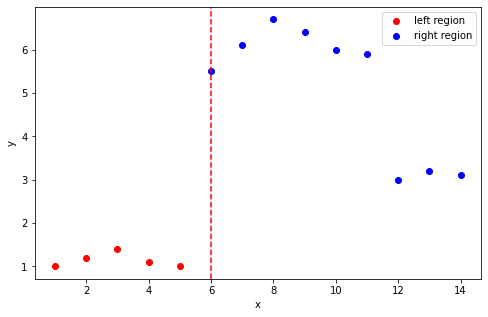

In [128]:
# plot kembali data beserta boundary yang telah kita dapat melalui perhitungan
# threshold
thre = best_threshold
# split data
data_left, data_right = split_data(data, thre)

# plot data
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5))
ax.scatter(data_left['X'], data_left['y'], c='r', label = 'left region')
ax.scatter(data_right['X'], data_right['y'], c='b', label = 'right region')
ax.axvline(x=thre, color='r', linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

bagi lagi data region kanan menjadi dua bagian

In [136]:
# fungsi untuk menentukan threshold terbaik
def create_tree(data):

    # buat range threshold yang ingin dicek
    thre_list = [*range(min(data['X']+1), max(data['X']+1), 1)]
    rmse_total = []
    
    for thre in thre_list:
        # split data
        data_left, data_right = split_data(data, thre)

        # hitung nilai prediksi
        pred_l = calculate_prediction(data_left)
        pred_r = calculate_prediction(data_right)

        if len(data_left)==0 or len(data_right)==0:
            pass

        rmse_l = calculate_rmse(data_left['y'], pred_l)
        rmse_r = calculate_rmse(data_right['y'], pred_r)

        rmse_total.append(rmse_l + rmse_r)

    # tentukan threshold terbaik berdasarkan rmse-nya
    best_thre = thre_list[np.argmin(rmse_total)]
    best_rmse = min(rmse_total)
    data_left, data_right = split_data(data, best_thre)

    return best_thre, best_rmse, data_left, data_right

In [137]:
bthre, brmse, data_left, data_right = create_tree(data_right)

In [138]:
bthre, brmse, data_left, data_right

(12,
 0.460243547812791,
      X    y
 5    6  5.5
 6    7  6.1
 7    8  6.7
 8    9  6.4
 9   10  6.0
 10  11  5.9,
      X    y
 11  12  3.0
 12  13  3.2
 13  14  3.1)

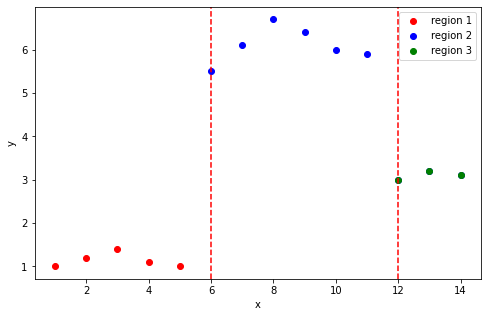

In [143]:
# plot kembali data beserta boundary yang telah kita dapat melalui perhitungan
# threshold
thre = best_threshold
# split data
data_left, data_right = split_data(data, thre)
_, data_most_right = split_data(data_right, bthre)

# plot data
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5))
ax.scatter(data_left['X'], data_left['y'], c='r', label = 'region 1')
ax.scatter(data_right['X'], data_right['y'], c='b', label = 'region 2')
ax.scatter(data_most_right['X'], data_most_right['y'], c='g', label = 'region 3')
ax.axvline(x=thre, color='r', linestyle='--')
ax.axvline(x=bthre, color='r', linestyle='--')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [141]:
# TODO: coba dengan sklearn